In [1]:
import pandas as pd
import ERgene as ergene

In [2]:
data = pd.read_csv('dataset/6_51.csv', index_col=0)
data.head()

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GSM677118,GSM677119,GSM677120,GSM677121,GSM677122,GSM677123,GSM677124,GSM677125,GSM677126,GSM677127,...,GSM677173,GSM677174,GSM677175,GSM677176,GSM677177,GSM677178,GSM677179,GSM677180,GSM677181,GSM677182
ID_REF,,,,,,,,,,,,,,,,,,,,,
!Sample_characteristics_ch1,case,case,case,case,case,case,case,case,control,control,...,case,control,control,control,control,control,control,control,control,control
1007_s_at,7.313129902,7.374300003,7.192850113,7.330090046,7.337329865,7.565680027,7.283520222,7.362619877,7.673220158,7.597750187,...,7.449299812,7.552509785,7.302529812,7.542019844,7.295660019,7.683050156,7.509729862,7.40997982,7.184770107,7.425549984
1053_at,8.248959541,8.015270233,8.003720284,8.044589996,8.078860283,7.738059998,8.143050194,8.17772007,7.887390137,8.259849548,...,8.065270424,8.052109718,8.04666996,7.973859787,7.999720097,8.063819885,8.029930115,8.002440453,8.059209824,7.891580105
117_at,8.692669868,7.980780125,8.613160133,8.491809845,8.486410141,7.595240116,8.629899979,8.250579834,8.611780167,8.565400124,...,8.542070389,8.093770027,8.833140373,8.787150383,8.764630318,7.945129871,8.046059608,8.435549736,8.882349968,8.522660255
121_at,7.838779926,7.86191988,7.835380077,7.763289928,7.718770027,7.62567997,7.98830986,8.174550056,7.963469982,8.084560394,...,8.038550377,8.043219566,7.974780083,7.786789894,7.790540218,7.959050179,7.753210068,7.833710194,7.926020145,7.796840191


In [3]:
data.dropna(axis=0, inplace=True)
df = data.drop(axis=1, index="!Sample_characteristics_ch1").astype('float')

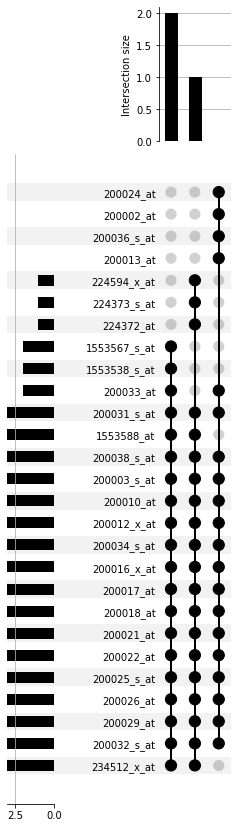

In [4]:
erg = ergene.FindERG(df, 3, figure=True)

In [5]:
erg

['200031_s_at',
 '200026_at',
 '200017_at',
 '200010_at',
 '200016_x_at',
 '200021_at',
 '200012_x_at',
 '200032_s_at',
 '200018_at',
 '200038_s_at',
 '200003_s_at',
 '200025_s_at',
 '200022_at',
 '200029_at',
 '200034_s_at']

In [6]:
df_2 = ergene.normalizationdata(df, erg[0])

## Train on `erg_normalized` data

In [7]:
import numpy as np

from dataloader.cleaning import clean_genome_df
from algorithms import multiple_model_training

In [8]:
train_option = dict(
    hidden_layer_size=[128, 64, 32],
    batch_size=32,
    learning_rate=0.01,
    neural_network_max_iter=200,
    n_splits=5,
)

In [ ]:
for genome in erg:
    df_normal = ergene.normalizationdata(df, genome)
    data.iloc[1:, :] = df_normal
    x, y = clean_genome_df(data)
    print(f"* TrainrStart with {genome} genome *")
    multiple_model_training(train_option, x, y)
    print("*" * 80)

* TrainrStart with 200031_s_at genome *
SVC
{   'fit_time': array([0.10560155, 0.11049747, 0.09890461, 0.13860559, 0.19547534]),
    'score_time': array([0.05885196, 0.06449652, 0.1014452 , 0.05180693, 0.05987501]),
    'test_score': array([0.63636364, 0.5       , 0.8       , 0.4       , 0.5       ])}


/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([1.81982875, 1.88179517, 1.86312103, 1.70546985, 1.90610671]),
    'score_time': array([0.00427485, 0.00381279, 0.00359726, 0.0035522 , 0.00321579]),
    'test_score': array([0.81818182, 0.6       , 0.7       , 0.6       , 0.8       ])}
KNeighborClassifier
{   'fit_time': array([0.00621819, 0.00722313, 0.00766039, 0.00890088, 0.00712085]),
    'score_time': array([0.02374744, 0.02391243, 0.02229381, 0.0257225 , 0.02610373]),
    'test_score': array([0.72727273, 0.6       , 0.8       , 0.5       , 0.7       ])}
NeuralNetwork
{   'fit_time': array([5.87423587, 5.78453732, 5.77867532, 5.69544649, 5.75444674]),
    'score_time': array([0.00685763, 0.00658059, 0.00657487, 0.00670123, 0.00644112]),
    'test_score': array([0.18181818, 0.4       , 0.6       , 0.4       , 0.6       ])}
********************************************************************************
* TrainrStart with 200026_at genome *
SVC
{   'fit_time': array([0.10296535, 0.11215425, 

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([1.57110524, 1.62215829, 1.63181376, 1.59669471, 1.6648128 ]),
    'score_time': array([0.00390983, 0.00403905, 0.00345349, 0.00333047, 0.003824  ]),
    'test_score': array([0.54545455, 0.7       , 0.7       , 0.6       , 0.7       ])}
KNeighborClassifier
{   'fit_time': array([0.00772834, 0.00690246, 0.00778151, 0.01071978, 0.00722742]),
    'score_time': array([0.02429104, 0.02291417, 0.02267885, 0.02856708, 0.02335572]),
    'test_score': array([0.36363636, 0.6       , 0.7       , 0.8       , 0.6       ])}
NeuralNetwork
{   'fit_time': array([ 5.67035604,  5.72173738,  4.94332409,  5.35220385, 10.98593712]),
    'score_time': array([0.00701547, 0.00667667, 0.00771236, 0.00699687, 0.00620317]),
    'test_score': array([0.27272727, 0.4       , 0.5       , 0.3       , 0.5       ])}
********************************************************************************
* TrainrStart with 200017_at genome *
SVC
{   'fit_time': array([0.11245513, 0.10328

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([1.69587779, 1.63453245, 1.53486443, 1.67997146, 1.59250903]),
    'score_time': array([0.00387359, 0.00337481, 0.00386047, 0.00339174, 0.00894666]),
    'test_score': array([0.81818182, 0.7       , 0.8       , 0.9       , 0.6       ])}
KNeighborClassifier
{   'fit_time': array([0.00742102, 0.0068574 , 0.00683403, 0.00591612, 0.00683045]),
    'score_time': array([0.02107954, 0.02040219, 0.01908517, 0.02003527, 0.02106524]),
    'test_score': array([0.72727273, 0.5       , 0.8       , 0.6       , 0.7       ])}
NeuralNetwork
{   'fit_time': array([5.29469109, 5.87605715, 6.4479239 , 4.5524621 , 2.88432837]),
    'score_time': array([0.005023  , 0.00571227, 0.00609756, 0.00362897, 0.00363708]),
    'test_score': array([0.45454545, 0.5       , 0.2       , 0.4       , 0.6       ])}
********************************************************************************
* TrainrStart with 200010_at genome *
SVC
{   'fit_time': array([0.05304122, 0.05640626, 

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.90566874, 0.90890026, 0.91542053, 0.84755754, 0.90669656]),
    'score_time': array([0.00223732, 0.00184894, 0.00219369, 0.0021975 , 0.00195932]),
    'test_score': array([0.72727273, 0.7       , 0.6       , 0.6       , 0.7       ])}
KNeighborClassifier
{   'fit_time': array([0.00371718, 0.00369287, 0.00360298, 0.00381684, 0.00365663]),
    'score_time': array([0.01116419, 0.01057839, 0.01104736, 0.01047397, 0.01041293]),
    'test_score': array([0.36363636, 0.7       , 0.5       , 0.4       , 1.        ])}
NeuralNetwork
{   'fit_time': array([2.82853889, 2.76381326, 3.37007236, 2.7150352 , 2.90603518]),
    'score_time': array([0.00378799, 0.00365639, 0.00382662, 0.00360489, 0.00371909]),
    'test_score': array([0.36363636, 0.5       , 0.3       , 0.8       , 0.5       ])}
********************************************************************************
* TrainrStart with 200016_x_at genome *
SVC
{   'fit_time': array([0.05061293, 0.0547502 

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.87882352, 0.87708688, 0.83906054, 0.8828907 , 0.84713244]),
    'score_time': array([0.00220656, 0.00187635, 0.00200057, 0.00182533, 0.00194407]),
    'test_score': array([0.63636364, 0.6       , 0.7       , 0.6       , 0.6       ])}
KNeighborClassifier
{   'fit_time': array([0.00366735, 0.00367999, 0.0036881 , 0.00358272, 0.00359011]),
    'score_time': array([0.01083899, 0.01006889, 0.01031637, 0.01040554, 0.01046348]),
    'test_score': array([0.63636364, 0.8       , 0.9       , 0.5       , 0.6       ])}
NeuralNetwork
{   'fit_time': array([2.83939743, 2.80812097, 2.7443583 , 2.71268654, 2.76512218]),
    'score_time': array([0.00377202, 0.00394011, 0.00392008, 0.00392199, 0.00364447]),
    'test_score': array([0.36363636, 0.3       , 0.4       , 0.4       , 0.5       ])}
********************************************************************************
* TrainrStart with 200021_at genome *
SVC
{   'fit_time': array([0.04785275, 0.055305  , 

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.91342235, 0.86159515, 0.86044407, 0.84683347, 0.88772535]),
    'score_time': array([0.0021596 , 0.0019691 , 0.00167418, 0.00186872, 0.00163746]),
    'test_score': array([0.45454545, 0.6       , 0.8       , 0.8       , 0.7       ])}
KNeighborClassifier
{   'fit_time': array([0.00338364, 0.00341988, 0.00343943, 0.00347161, 0.00345683]),
    'score_time': array([0.0104351 , 0.01044226, 0.01018763, 0.01018405, 0.0101862 ]),
    'test_score': array([0.45454545, 0.7       , 0.5       , 0.9       , 0.8       ])}
NeuralNetwork
{   'fit_time': array([2.84936523, 2.84298301, 2.79800987, 3.00348425, 6.01269221]),
    'score_time': array([0.00374436, 0.00389767, 0.00378633, 0.00387073, 0.00407004]),
    'test_score': array([0.54545455, 0.5       , 0.2       , 0.4       , 0.5       ])}
********************************************************************************
* TrainrStart with 200012_x_at genome *
SVC
{   'fit_time': array([0.05838656, 0.05086923

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.8596282 , 0.94070506, 0.86112356, 0.87568116, 0.9224236 ]),
    'score_time': array([0.0023725 , 0.00179172, 0.00180054, 0.00154781, 0.00167847]),
    'test_score': array([0.63636364, 0.9       , 0.4       , 0.6       , 0.4       ])}
KNeighborClassifier
{   'fit_time': array([0.00330687, 0.00345373, 0.00343609, 0.00348926, 0.003443  ]),
    'score_time': array([0.01062822, 0.0099225 , 0.00977206, 0.00980878, 0.00973606]),
    'test_score': array([0.72727273, 0.7       , 0.5       , 0.7       , 0.4       ])}
NeuralNetwork
{   'fit_time': array([2.74909353, 2.73833561, 2.7584908 , 2.74852467, 2.78687096]),
    'score_time': array([0.00395203, 0.00376177, 0.00390744, 0.00369477, 0.00381804]),
    'test_score': array([0.72727273, 0.6       , 0.4       , 0.5       , 0.1       ])}
********************************************************************************
* TrainrStart with 200032_s_at genome *
SVC
{   'fit_time': array([0.04888797, 0.04737306

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.90500569, 0.85453439, 0.85138464, 0.85179901, 0.85690308]),
    'score_time': array([0.0020721 , 0.0019393 , 0.00164366, 0.0018034 , 0.00184369]),
    'test_score': array([0.63636364, 0.6       , 0.8       , 0.7       , 0.6       ])}
KNeighborClassifier
{   'fit_time': array([0.00340056, 0.00346684, 0.00342941, 0.00349259, 0.00340986]),
    'score_time': array([0.01061416, 0.01031089, 0.01047134, 0.01021886, 0.01021743]),
    'test_score': array([0.54545455, 0.5       , 0.6       , 0.8       , 0.6       ])}
NeuralNetwork
{   'fit_time': array([2.73899341, 2.74303174, 2.93561459, 2.90378523, 2.74684787]),
    'score_time': array([0.00368452, 0.00362325, 0.00354505, 0.00369859, 0.00361037]),
    'test_score': array([0.63636364, 0.4       , 0.5       , 0.4       , 0.5       ])}
********************************************************************************
* TrainrStart with 200018_at genome *
SVC
{   'fit_time': array([0.05025649, 0.07034922, 

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.87381434, 0.87093997, 0.9062469 , 0.83130956, 0.87481093]),
    'score_time': array([0.00220037, 0.00218749, 0.00208139, 0.00169373, 0.00193667]),
    'test_score': array([0.90909091, 0.8       , 0.8       , 0.5       , 0.6       ])}
KNeighborClassifier
{   'fit_time': array([0.00348377, 0.00345325, 0.00363803, 0.0035677 , 0.00342274]),
    'score_time': array([0.01130414, 0.00996709, 0.01000071, 0.01036954, 0.01027322]),
    'test_score': array([0.36363636, 0.7       , 0.7       , 0.8       , 0.8       ])}
NeuralNetwork
{   'fit_time': array([4.46907091, 2.76182723, 2.78262448, 2.77449322, 3.05273843]),
    'score_time': array([0.00366306, 0.00417852, 0.00374937, 0.00380278, 0.00394249]),
    'test_score': array([0.54545455, 0.8       , 0.5       , 0.7       , 0.3       ])}
********************************************************************************
* TrainrStart with 200038_s_at genome *
SVC
{   'fit_time': array([0.05096936, 0.05483985

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.8638916 , 0.84788632, 0.85649943, 0.85989642, 0.77427673]),
    'score_time': array([0.00204372, 0.00175858, 0.00166821, 0.00161505, 0.00167465]),
    'test_score': array([0.81818182, 0.6       , 0.8       , 0.7       , 0.5       ])}
KNeighborClassifier
{   'fit_time': array([0.00330091, 0.00349545, 0.00351238, 0.0034368 , 0.00381446]),
    'score_time': array([0.01043129, 0.00971699, 0.00957298, 0.0117178 , 0.01007771]),
    'test_score': array([0.45454545, 0.6       , 0.7       , 0.8       , 0.8       ])}
NeuralNetwork
{   'fit_time': array([2.7603631 , 2.79915619, 2.80604911, 2.74326515, 2.75540781]),
    'score_time': array([0.00369501, 0.00394559, 0.00359893, 0.00373507, 0.00374317]),
    'test_score': array([0.54545455, 0.4       , 0.4       , 0.3       , 0.4       ])}
********************************************************************************
* TrainrStart with 200003_s_at genome *
SVC
{   'fit_time': array([0.04731822, 0.05658817

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.86701536, 0.8479228 , 0.95851135, 0.93710494, 0.99496818]),
    'score_time': array([0.00214863, 0.00197744, 0.00187516, 0.002033  , 0.00200438]),
    'test_score': array([0.54545455, 0.5       , 0.7       , 0.7       , 0.9       ])}
KNeighborClassifier
{   'fit_time': array([0.00484633, 0.00446796, 0.00391221, 0.00390458, 0.00357008]),
    'score_time': array([0.01171255, 0.01087046, 0.01145768, 0.01148295, 0.01101947]),
    'test_score': array([0.63636364, 0.8       , 0.7       , 0.7       , 0.5       ])}
NeuralNetwork
{   'fit_time': array([ 4.80631161,  2.84522104,  2.88370228,  3.01896667, 13.35286665]),
    'score_time': array([0.00364447, 0.00379324, 0.00335264, 0.00374293, 0.00371289]),
    'test_score': array([0.45454545, 0.3       , 0.9       , 0.6       , 0.5       ])}
********************************************************************************
* TrainrStart with 200025_s_at genome *
SVC
{   'fit_time': array([0.04991364, 0.053

/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/omidsa75/anaconda3/envs/p38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

LogisticRegression
{   'fit_time': array([0.81062627, 0.89141178, 0.93507266, 0.89638805, 0.93113756]),
    'score_time': array([0.00217795, 0.00209403, 0.00165892, 0.00159836, 0.00182652]),
    'test_score': array([0.81818182, 0.5       , 0.8       , 0.7       , 0.6       ])}
KNeighborClassifier
{   'fit_time': array([0.00345016, 0.00343752, 0.00461221, 0.00368977, 0.00446677]),
    'score_time': array([0.01154375, 0.01364517, 0.01613021, 0.01157737, 0.01143622]),
    'test_score': array([0.72727273, 0.3       , 0.7       , 0.8       , 0.4       ])}
